# Basics

Link [here](https://facebookincubator.github.io/prophet/docs/quick_start.html)

In [1]:
# Python
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [7]:
# Python
df = pd.read_csv('data/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [8]:
m = Prophet()
m.fit(df);

In [9]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.213787,7.466964,8.978793
3266,2017-01-16,8.538876,7.801655,9.271160
3267,2017-01-17,8.326293,7.576833,9.026459
3268,2017-01-18,8.158930,7.400832,8.921065
3269,2017-01-19,8.170898,7.446355,8.913276


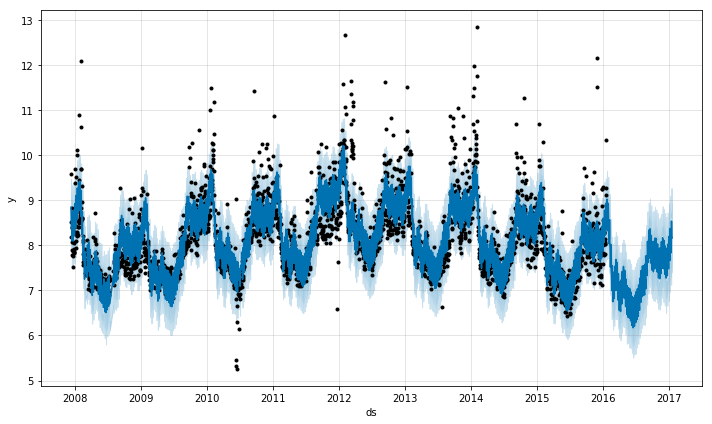

In [12]:
m.plot(forecast)

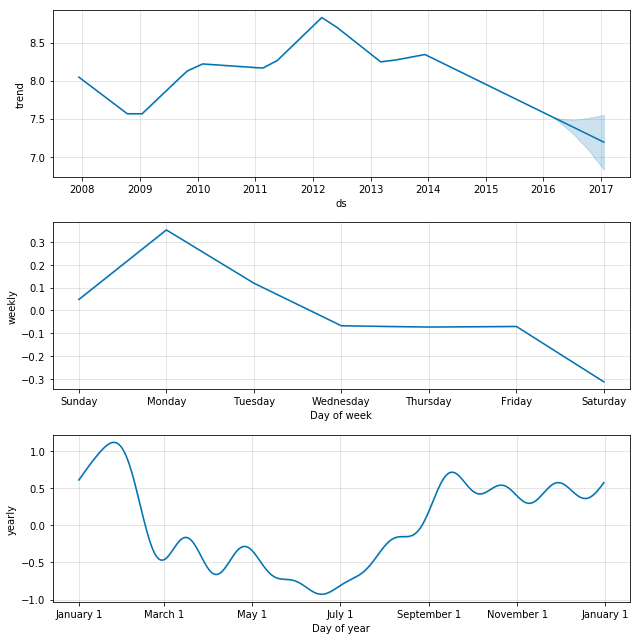

In [13]:
m.plot_components(forecast)

# Growth

Link [here](https://facebookincubator.github.io/prophet/docs/forecasting_growth.html)

In [17]:
df['cap'] = 12

In [18]:
m = Prophet(growth='logistic')
m.fit(df)

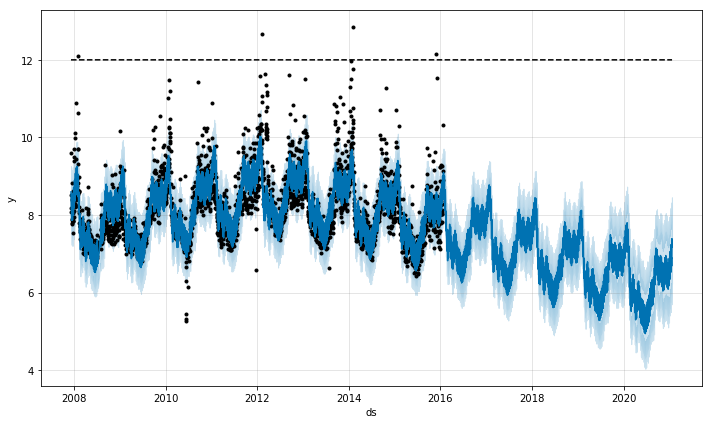

In [19]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 12
fcst = m.predict(future)
m.plot(fcst)

# Changepoints

Link [here](https://facebookincubator.github.io/prophet/docs/trend_changepoints.html)

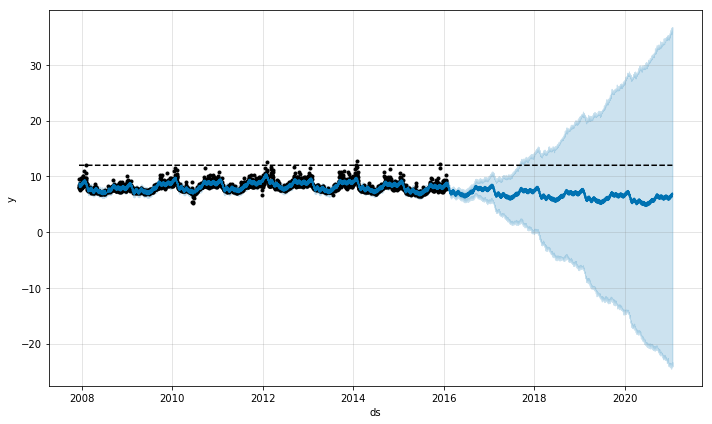

In [22]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
m.plot(forecast)

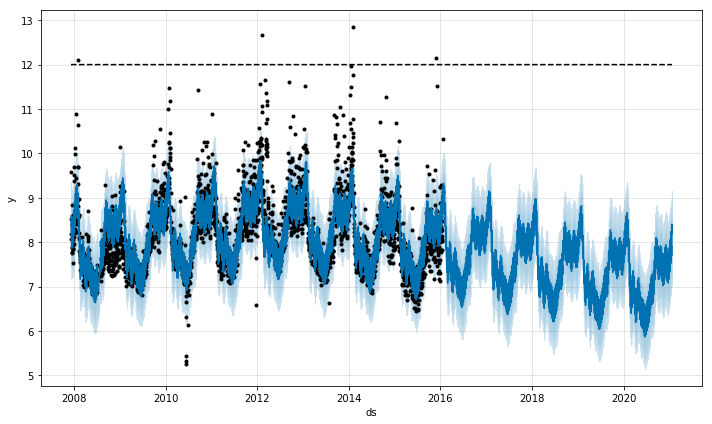

In [21]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
m.plot(forecast)

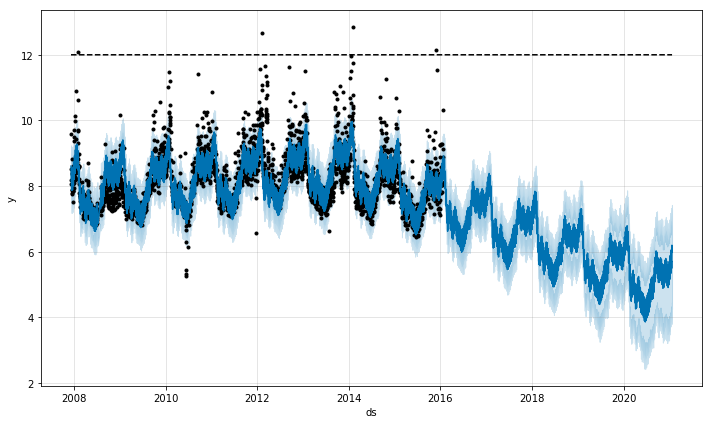

In [23]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
m.plot(forecast)

# Holidays

Link [here](https://facebookincubator.github.io/prophet/docs/holiday_effects.html)

In [24]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [25]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

In [26]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.224671,1.198000
2191,2014-02-03,1.901035,1.474798
2532,2015-01-11,1.224671,0.000000
2533,2015-01-12,1.901035,0.000000
2901,2016-01-17,1.224671,0.000000
2902,2016-01-18,1.901035,0.000000
2908,2016-01-24,1.224671,0.000000
2909,2016-01-25,1.901035,0.000000
2922,2016-02-07,1.224671,1.198000
2923,2016-02-08,1.901035,1.474798


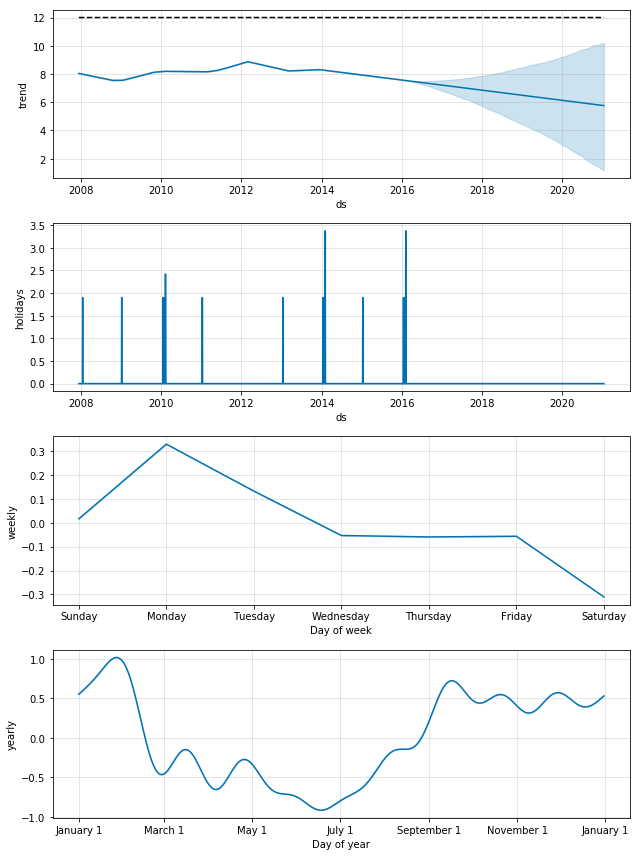

In [27]:
m.plot_components(forecast)

In [28]:
m = Prophet(holidays=holidays, holidays_prior_scale=1).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.317902,0.786721
2191,2014-02-03,1.989285,0.644941
2532,2015-01-11,1.317902,0.000000
2533,2015-01-12,1.989285,0.000000
2901,2016-01-17,1.317902,0.000000
2902,2016-01-18,1.989285,0.000000
2908,2016-01-24,1.317902,0.000000
2909,2016-01-25,1.989285,0.000000
2922,2016-02-07,1.317902,0.786721
2923,2016-02-08,1.989285,0.644941


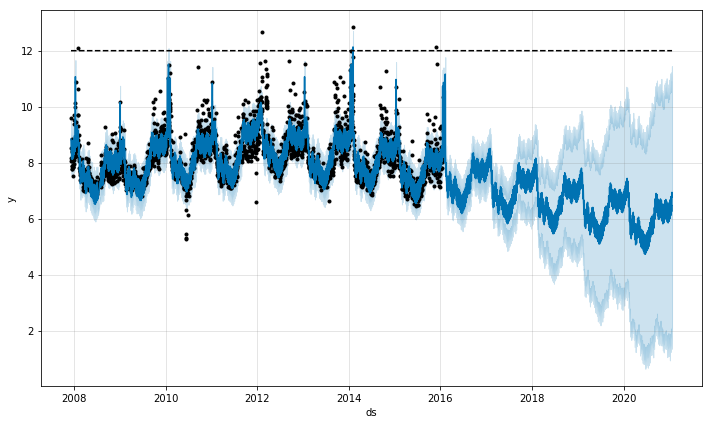

In [29]:
m.plot(forecast)